# Investigating performance of NetSuite API for Journals

A jupyter notebook application documenting  an interaction with the netsuite soap api interface

Getting results without pagination

In [1]:
import urllib3
import requests
import xmltodict, json
import csv  

from datetime import datetime

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

start_time = datetime.now()

# SOAP request URL
url = "https://tstdrv2521788.suitetalk.api.netsuite.com/services/NetSuitePort_2019_2"

# Intended structure
payload = """
<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com" xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com"
xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
   <soapenv:Header>
      <urn:applicationInfo>
        <urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
        </urn:applicationInfo>
        <urn:passport>
            <urn1:email>au_next-data-sources@pwc.com</urn1:email>
            <urn1:password>XR5/_q[zSX?g</urn1:password>
            <urn1:account>tstdrv2521788</urn1:account>
         <urn1:role internalId="3" />
      </urn:passport>
      <urn:searchPreferences>
          <urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
          <urn:pageSize>10</urn:pageSize>
      </urn:searchPreferences>
   </soapenv:Header>
   <soapenv:Body>
      <urn:search>
         <searchRecord xsi:type="ns1:TransactionSearch" xmlns:ns1="urn:sales_2019_2.transactions.webservices.netsuite.com">
                 <ns1:basic xsi:type="ns2:TransactionSearchBasic" xmlns:ns2="urn:common_2019_2.platform.webservices.netsuite.com">
                    <ns2:lastModifiedDate operator="within" xsi:type="ns3:SearchDateField" xmlns:ns3="urn:core_2019_2.platform.webservices.netsuite.com">
                        <ns3:searchValue xsi:type="xsd:dateTime">1970-01-01T00:00:00-00:00</ns3:searchValue>
                        <ns3:searchValue2 xsi:type="xsd:dateTime">2022-02-15T00:00:00-00:00</ns3:searchValue2>
       
                    </ns2:lastModifiedDate>
                    <ns2:type operator='anyOf' xsi:type='urn1:SearchEnumMultiSelectField'>
                        <urn1:searchValue xsi:type='xsd:string' >journal</urn1:searchValue>
                    </ns2:type>
                </ns1:basic>
          </searchRecord>
      </urn:search>
   </soapenv:Body>
</soapenv:Envelope>
"""

# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8',
    'SOAPAction':'search'
}

# POST request
response = requests.request("POST", url, headers=headers, data=payload, verify=False)
  
end_time = datetime.now()

# root = ET.fromstring(response)

# prints the response
print(response)
# print(root.tag)
print('Duration: {}'.format(end_time - start_time))

<Response [200]>
Duration: 0:00:16.910672


## Results sample
The duration it takes to make a simple requst greatly varies due to a number of factors

In [5]:
# display the results
obj = xmltodict.parse(response.text)

# pagination header section
pagination_enabler = obj["soapenv:Envelope"]["soapenv:Header"]["platformMsgs:documentInfo"]["platformMsgs:nsId"]
print(pagination_enabler)

WEBSERVICES_TSTDRV2521788_02202022447307232870284436_46eca5b


# Simple pagination query

In [6]:
start_time = datetime.now()

headers = {
    'Content-Type': 'text/xml; charset=utf-8',
    'SOAPAction':'searchMoreWithId'
}

pagination = """<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/"
xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com"
xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com"
xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
   <soapenv:Header>
      <urn:applicationInfo>
        <urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
        </urn:applicationInfo>
        <urn:passport>
            <urn1:email>au_next-data-sources@pwc.com</urn1:email>
            <urn1:password>XR5/_q[zSX?g</urn1:password>
            <urn1:account>tstdrv2521788</urn1:account>
         <urn1:role internalId="3" />
      </urn:passport>
      <urn:searchPreferences>
          <urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
          <urn:pageSize>10</urn:pageSize>
      </urn:searchPreferences>
   </soapenv:Header>
   <soapenv:Body>
        <urn:searchMoreWithId xmlns="urn:core_2019_2.platform.webservices.netsuite.com">
            <urn:searchId>""" + pagination_enabler + """</urn:searchId>
            <urn:pageIndex>1</urn:pageIndex>
        </urn:searchMoreWithId>
   </soapenv:Body>
</soapenv:Envelope>"""

# POST request
response = requests.request("POST", url, headers=headers, data=pagination, verify=False)
  
end_time = datetime.now()

# root = ET.fromstring(response)

# prints the response
print(response)
# print(root.tag)
print('Duration: {}'.format(end_time - start_time))

<Response [200]>
Duration: 0:00:09.943093


In [7]:
# check sample response for the pagination
response.text

'<?xml version="1.0" encoding="UTF-8"?><soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"><soapenv:Header><platformMsgs:documentInfo xmlns:platformMsgs="urn:messages_2019_2.platform.webservices.netsuite.com"><platformMsgs:nsId>WEBSERVICES_TSTDRV2521788_022020224473252531943866910_c5a8cd</platformMsgs:nsId></platformMsgs:documentInfo></soapenv:Header><soapenv:Body><searchMoreWithIdResponse xmlns="urn:messages_2019_2.platform.webservices.netsuite.com"><platformCore:searchResult xmlns:platformCore="urn:core_2019_2.platform.webservices.netsuite.com"><platformCore:status isSuccess="true"/><platformCore:totalRecords>96</platformCore:totalRecords><platformCore:pageSize>10</platformCore:pageSize><platformCore:totalPages>10</platformCore:totalPages><platformCore:pageIndex>1</platformCore:pageIndex><platformCore:searchId>WEBSERVICES_TSTDRV2521788_02202022447307232870284436_

## Full page pagination - Time metrics

In [ ]:
start_time = datetime.now()

def sizeof_fmt(num, suffix="B"):
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

pageSizeInitial = "100"

# Intended structure
payload = """
<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com" xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com"
	xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
	<soapenv:Header>
 		<urn:applicationInfo>
			<urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
        </urn:applicationInfo>
		<urn:searchPreferences>
			<urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
			<urn:pageSize>""" + pageSizeInitial+ """</urn:pageSize>
		</urn:searchPreferences>
		<urn:passport>
         <urn1:email>au_next-data-sources@pwc.com</urn1:email>
            <urn1:password>XR5/_q[zSX?g</urn1:password>
            <urn1:account>tstdrv2521788</urn1:account>
         <urn1:role internalId="3" />
      </urn:passport>
	</soapenv:Header>
	<soapenv:Body>
		<urn:search>
			<searchRecord xsi:type = "ns1:TransactionSearchAdvanced"
				xmlns:ns1 = "urn:sales_2019_2.transactions.webservices.netsuite.com">
				<ns1:criteria>
					<ns1:basic
						xmlns:ns2="urn:common_2019_2.platform.webservices.netsuite.com">
						<ns2:tranDate operator = "within" xsi:type = "urn1:SearchDateField">
							<urn1:searchValue xsi:type = "xsd:dateTime">1970-01-01T00:00:00-00:00</urn1:searchValue>
							<urn1:searchValue2 xsi:type = "xsd:dateTime">2022-02-15T00:00:00-00:00</urn1:searchValue2>
						</ns2:tranDate>
					</ns1:basic>
				</ns1:criteria>
				<ns1:columns>
					<ns1:basic
						xmlns:ns2="urn:common_2019_2.platform.webservices.netsuite.com"
						xmlns:ns3="urn:core_2019_2.platform.webservices.netsuite.com">
						<ns2:internalId/>
						<ns2:tranId/>
						<ns2:tranDate/>
						<ns2:currency/>
						<ns2:exchangeRate/>
						<ns2:memo/>
						<ns2:dateCreated/>
						<ns2:lastModifiedDate/>
						<ns2:line/>
						<ns2:postingPeriod/>
						<ns2:debitAmount/>
						<ns2:creditAmount/>
						<ns2:account/>
						<ns2:dueDate/>
						<ns2:endDate/>
						<ns2:taxTotal/>
						<ns2:item/>
						<ns2:amount/>
						<ns2:type/>
					</ns1:basic>
				</ns1:columns>
			</searchRecord>
		</urn:search>
	</soapenv:Body>
</soapenv:Envelope>
"""

# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8',
    'SOAPAction':'search'
}

# POST request
response_pagd = requests.request("POST", url, headers=headers, data=payload, verify=False)

# display the results as an xml dict
journal_resp = xmltodict.parse(response_pagd.text)

# print(response_pagd.text)

# pagination header section
journal_nsId = journal_resp["soapenv:Envelope"]["soapenv:Header"]["platformMsgs:documentInfo"]["platformMsgs:nsId"]

journal_pageSize = journal_resp["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:pageSize"]

journal_totalPages = journal_resp["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:totalPages"]

journal_totalRecords = journal_resp["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:totalRecords"]
   
# print(journal_nsId)
print(journal_pageSize)
# print(journal_totalPages)
# print(journal_totalRecords)


page_index = 1
# int(journal_total_page)
while page_index <= int(journal_totalPages):
   
   start_time1 = datetime.now()

   # SOAP request URL
   url = "https://tstdrv2521788.suitetalk.api.netsuite.com/services/NetSuitePort_2019_2"

   headers = {
      'Content-Type': 'text/xml; charset=utf-8',
      'SOAPAction':'searchMoreWithId'
   }

   pagination = """
      <soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com" xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
         <soapenv:Header>
            <urn:applicationInfo>
               <urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
            </urn:applicationInfo>
            <urn:passport>
                  <urn1:email>au_next-data-sources@pwc.com</urn1:email>
                  <urn1:password>XR5/_q[zSX?g</urn1:password>
                  <urn1:account>tstdrv2521788</urn1:account>
               <urn1:role internalId="3" />
            </urn:passport>
            <urn:searchPreferences>
               <urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
               <urn:pageSize>""" + journal_pageSize + """</urn:pageSize>
            </urn:searchPreferences>
         </soapenv:Header>
         <soapenv:Body>
            <urn:searchMoreWithId xmlns="urn:core_2019_2.platform.webservices.netsuite.com">
                  <urn:searchId>""" + journal_nsId + """</urn:searchId>
                  <urn:pageIndex>""" + str(page_index) + """</urn:pageIndex>
            </urn:searchMoreWithId>
         </soapenv:Body>
      </soapenv:Envelope>
   """

   # POST request
   response_new = requests.request("POST", url, headers=headers, data=pagination, verify=False)
   
   end_time1 = datetime.now()
   
   final_time_taken = format(end_time1 - start_time1)
   
   # create file and log all the file requests
   with open('files/json_paginated.csv', 'a') as outfile_page:
      # json.dump(obj_pagd, outfile)
      outfile_page.write(str(page_index) + "," + journal_pageSize + "," + journal_nsId + "," + str(sizeof_fmt(len(response_new.text))) + "," + final_time_taken + "\n")
   # structure as defined by Phil 

   page_index += 1

# total time
end_time = datetime.now()

# prints the response
print(response_pagd)

# print the file size
print(sizeof_fmt(len(response_pagd.text)))

# print(root.tag)
print('Duration final: {}'.format(end_time - start_time))

100


# Journal retrieve

In [11]:
# SOAP request URL
url = "https://tstdrv2521788.suitetalk.api.netsuite.com/services/NetSuitePort_2019_2"

# Intended structure
payload = """
<soapenv:Envelope
	xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com" xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
	<soapenv:Header>
		<urn:applicationInfo>
			<urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
        </urn:applicationInfo>
		<urn:searchPreferences>
			<urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
			<urn:pageSize>1000</urn:pageSize>
		</urn:searchPreferences>
		<urn:passport>
            <urn1:email>au_next-data-sources@pwc.com</urn1:email>
            <urn1:password>XR5/_q[zSX?g</urn1:password>
            <urn1:account>tstdrv2521788</urn1:account>
            <urn1:role internalId="3" />
        </urn:passport>
	</soapenv:Header>
	<soapenv:Body>
		<urn:search>
			<searchRecord xsi:type = "ns1:TransactionSearchAdvanced"
				xmlns:ns1 = "urn:sales_2019_2.transactions.webservices.netsuite.com">
				<ns1:criteria>
					<ns1:basic
						xmlns:ns2="urn:common_2019_2.platform.webservices.netsuite.com">
						<ns2:tranDate operator = "within" xsi:type = "urn1:SearchDateField">
							<urn1:searchValue xsi:type = "xsd:dateTime">1970-01-01T00:00:00-00:00</urn1:searchValue>
							<urn1:searchValue2 xsi:type = "xsd:dateTime">2022-02-15T00:00:00-00:00</urn1:searchValue2>
						</ns2:tranDate>
					</ns1:basic>
				</ns1:criteria>
				<ns1:columns>
					<ns1:basic
						xmlns:ns2="urn:common_2019_2.platform.webservices.netsuite.com"
						xmlns:ns3="urn:core_2019_2.platform.webservices.netsuite.com">
						<ns2:internalId/>
						<ns2:tranId/>
						<ns2:tranDate/>
						<ns2:currency/>
						<ns2:exchangeRate/>
						<ns2:memo/>
						<ns2:dateCreated/>
						<ns2:lastModifiedDate/>
						<ns2:line/>
						<ns2:postingPeriod/>
						<ns2:debitAmount/>
						<ns2:creditAmount/>
						<ns2:account/>
						<ns2:dueDate/>
						<ns2:endDate/>
						<ns2:taxTotal/>
						<ns2:item/>
						<ns2:amount/>
						<ns2:type/>
					</ns1:basic>
				</ns1:columns>
			</searchRecord>
		</urn:search>
	</soapenv:Body>
</soapenv:Envelope>
"""

# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8',
    'SOAPAction':'search'
}

# POST request
jorunal_response = requests.request("POST", url, headers=headers, data=payload, verify=False)
  
end_time = datetime.now()

# root = ET.fromstring(response)

# prints the response
print(jorunal_response)
# print(root.tag)
print('Duration: {}'.format(end_time - start_time))

<Response [200]>
Duration: 1:54:02.131156


In [12]:
print(len(jorunal_response.text))

1839942


## Journal pagination - get data

In [13]:
# display the results
journal_obj = xmltodict.parse(jorunal_response.text)

# pagination header section
journal_pagination = journal_obj["soapenv:Envelope"]["soapenv:Header"]["platformMsgs:documentInfo"]["platformMsgs:nsId"]
print(journal_pagination)

journal_page_size = journal_obj["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:pageSize"]

journal_total_page = journal_obj["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:totalPages"]

journal_total_records = journal_obj["soapenv:Envelope"]["soapenv:Body"]["searchResponse"]["platformCore:searchResult"]["platformCore:totalRecords"]

print(journal_page_size)
print(journal_total_page)
print(journal_total_records)

WEBSERVICES_TSTDRV2521788_02202022457523109712953758_8f707f6
1000
9
8304


# Journal pagination function

In [2]:
# create a function accepting 2 parameters 


# define parameters
# 3. soap - pageSize
# 3. soap - paginationId
# 3. soap - pageIndex
def pagination_func(page_size, pagination_id, page_index, total_records):
    
    start_time1 = datetime.now()

    headers = {
        'Content-Type': 'text/xml; charset=utf-8',
        'SOAPAction':'searchMoreWithId'
    }

    pagination = """<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/"
    xmlns:urn="urn:messages_2019_2.platform.webservices.netsuite.com"
    xmlns:urn1="urn:core_2019_2.platform.webservices.netsuite.com"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
    <soapenv:Header>
        <urn:applicationInfo>
            <urn:applicationId>BB3A8015-9FB5-4E6D-B3DE-8C54E336388D</urn:applicationId>
            </urn:applicationInfo>
            <urn:passport>
                <urn1:email>au_next-data-sources@pwc.com</urn1:email>
                <urn1:password>XR5/_q[zSX?g</urn1:password>
                <urn1:account>tstdrv2521788</urn1:account>
            <urn1:role internalId="3" />
        </urn:passport>
        <urn:searchPreferences>
            <urn:bodyFieldsOnly>false</urn:bodyFieldsOnly>
            <urn:pageSize>""" + page_size + """</urn:pageSize>
        </urn:searchPreferences>
    </soapenv:Header>
    <soapenv:Body>
            <urn:searchMoreWithId xmlns="urn:core_2019_2.platform.webservices.netsuite.com">
                <urn:searchId>""" + pagination_id + """</urn:searchId>
                <urn:pageIndex>""" + page_index + """</urn:pageIndex>
            </urn:searchMoreWithId>
    </soapenv:Body>
    </soapenv:Envelope>"""

    # POST request
    response_page = requests.request("POST", url, headers=headers, data=pagination, verify=False)
    
    end_time1 = datetime.now()
    
    total_time_taken = format(end_time1 - start_time1)

    # root = ET.fromstring(response)

    # prints the response
    # print(response_page.text)
    print('page_size: ' + page_size)
    print('total_file_size: ' + str(len(response_page.text)))
    print('total_records: ' + journal_total_records)
    print('duration: ' + str(total_time_taken))
    print('======')
    
    # story = 'page_size: ' + str(page_size) + ' total_file_size:' + str(len(response_page.text)) + ' total_records: ' + journal_total_records + ' duration: ' + format(end_time1 - start_time1) + "\n"    
    
    header = ['page_size', 'total_file_size', 'total_records', 'duration']
    data = [page_size, str(len(response_page.text)), journal_total_records, str(total_time_taken)]
    
    # log the report, export to csv or file to analyze   
    with open('files/json_data.csv', 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        
        # write the header
        # writer.writerow(header)

        # write the data
        writer.writerow(data)

        # outfile_page.write('page_size: ' + str(page_size) + ' total_file_size:' + str(len(response_page.text)) + ' total_records: ' + journal_total_records + ' duration: ' + format(end_time1 - start_time1) + "\n")
        


### Display results

In [71]:
# print(str(journal_page_size) + " ~ " + journal_pagination + " ~ " + str(journal_total_page))
page_index = 1
# int(journal_total_page)
while page_index <= int(journal_total_page):
    
    sample = pagination_func(str(journal_page_size), journal_pagination, str(page_index), str(journal_total_records))

    print('page_number: ' + str(page_index))
    
    print(sample)
    
    page_index += 1

page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:01.171181
page_number: 1
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.456078
page_number: 2
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.392565
page_number: 3
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.390876
page_number: 4
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.391980
page_number: 5
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.416167
page_number: 6
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.465598
page_number: 7
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.478529
page_number: 8
None
page_size: 1000
total_file_size: 1139
total_records: 8304
duration: 0:00:00.433505
page_number: 9
None


# Visualization

In [626]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('files/json_data.csv',header=0)

df

,page_size,total_file_size,total_records,time
0,100,185644,8304,0:00:00.732613
1,100,185663,8304,0:00:00.654733
2,100,185606,8304,0:00:00.671318
3,100,185613,8304,0:00:00.775167
4,100,185639,8304,0:00:00.713570
...,...,...,...,...
243,1000,1874936,8304,0:00:01.871795
244,1000,1891403,8304,0:00:02.065422
245,1000,1872209,8304,0:00:01.990614
246,1000,1839417,8304,0:00:02.087019


## line plot

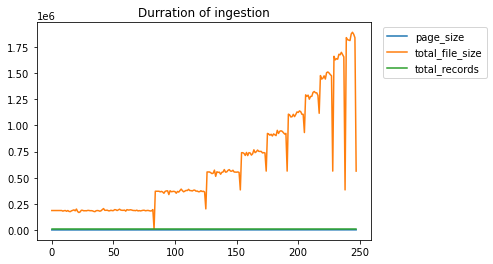

In [627]:
df.plot(kind='line', title="Durration of ingestion").legend(bbox_to_anchor= (1.02, 1));

In [625]:
df

,page_size,total_records,time
total_file_size,,,
185644,100,8304,0:00:00.732613
185663,100,8304,0:00:00.654733
185606,100,8304,0:00:00.671318
185613,100,8304,0:00:00.775167
185639,100,8304,0:00:00.713570
...,...,...,...
1874936,1000,8304,0:00:01.871795
1891403,1000,8304,0:00:02.065422
1872209,1000,8304,0:00:01.990614
